In [1]:
from optimizer3 import *
from BRL import p_matrix, I_matrix

In [2]:
import pandas as pd
data = pd.read_excel('./data/data.xlsx', index_col=0)
data.drop(index=56, inplace=True)

In [3]:
tests = data.loc[:,1:].values
tests.shape

(119, 10)

In [7]:
similarities = [[] for _ in range(len(zeros))]

In [11]:
for zero in zeros:
    for test in tests:
        solution = solve(e_T=test, w2=int(zero['w2']), w3=int(zero['w3']), w5=int(zero['w5']), w6=int(zero['w6']), w8=int(zero['w8']), w9=int(zero['w9']))
        x = np.zeros(66)
        if bool(solution): # 해 존재시
            for i in solution:
                x[i] = solution[i]
            e = p_matrix@x
            s = np.dot(test, e)/(np.linalg.norm(e)*np.linalg.norm(test))
            similarities[zeros.index(zero)].append(s)

In [25]:
print(len(similarities))
for similarity in similarities:
    print(len(similarity))

13
119
119
119
119
119
119
119
119
119
119
119
119
119


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
def making_plot(similarity, name):
    plt.clf()
    sns.kdeplot(similarity, shade=True)

    # Calculate mean and standard deviation
    mean = np.mean(similarity)
    std = np.std(similarity)
    
    # Scale the data
    scaled = (similarity - mean) / std
    scaled_mean = np.mean(scaled)
    scaled_std = np.std(scaled)

    # Add vertical lines and text
    plt.axvline(mean, color='red', linestyle='--', label='Mean')
    plt.text(mean - 0.3*mean, 0.9, f'Mean: {mean:.2f}', transform=plt.gca().transAxes)
    plt.text(mean - 0.3*mean, 0.8, f'Std: {std:.2f}', transform=plt.gca().transAxes)
    plt.text(mean - 0.3*mean, 0.7, f'Scaled Mean: {scaled_mean:.2f}', transform=plt.gca().transAxes)
    plt.text(mean - 0.3*mean, 0.6, f'Scaled Std: {scaled_std:.2f}', transform=plt.gca().transAxes)

    # Set plot labels and legend
    plt.xlabel('Similarity')
    plt.ylabel('Density')
    plt.title(f'Distribution of similarity {name}')
    plt.legend()

    # Save the plot to a file
    plt.savefig(f'{name}.png')

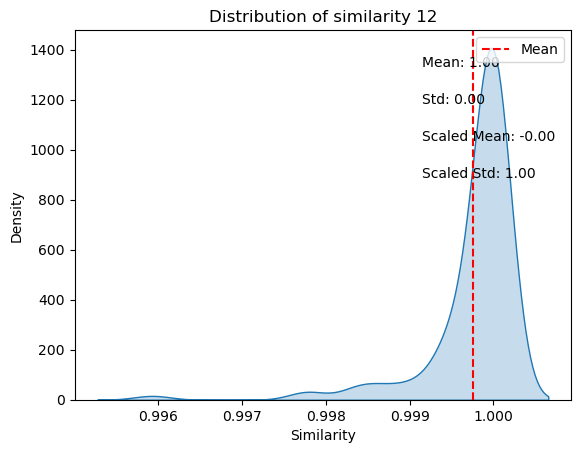

In [35]:
for similarity in similarities:
    making_plot(similarity=similarity, name=f'{similarities.index(similarity)}')

In [36]:
zeros[9]

{'w2': 607.0, 'w3': 51.0, 'w5': 456.0, 'w6': 8.0, 'w8': 960.0, 'w9': 66.0}